# TIDYMODELS Exploration&Research

## Summary

The tidymodels framework is a collection of packages for modeling and machine learning using tidyverse principles. 

It includes a core set of packages that are loaded on startup:

* broom takes the messy output of built-in functions in R, such as lm, nls, or t.test, and turns them into tidy data frames.

* dials has tools to create and manage values of tuning parameters.

* dplyr contains a grammar for data manipulation.

* ggplot2 implements a grammar of graphics.

* infer is a modern approach to statistical inference.

* parsnip is a tidy, unified interface to creating models.

* purrr is a functional programming toolkit.

* recipes is a general data preprocessor with a modern interface. It can create model matrices that incorporate feature engineering, imputation, and other help tools.

* rsample has infrastructure for resampling data so that models can be assessed and empirically validated.

* tibble has a modern re-imagining of the data frame.

* tune contains the functions to optimize model hyper-parameters.

* workflows has methods to combine pre-processing steps and models into a single object.

* yardstick contains tools for evaluating models (e.g. accuracy, RMSE, etc.)

The tidymodels framework also includes many other packages designed for specialized data analysis and modeling tasks.

It can be installed using install.packages("tidymodels")

Tidymodels framework supports the use of multiple cores for processing

## Comparison

The most popular (by number of monthly downloads from Github) ML framework available for R to date is caret and its successor packages that are wrapped together in a tidymodels framework. Max Kuhn builds both of these packages. Like mlr was refactored into mlr3, caret was refactored into tidymodels. Since caret has been around for a long time, and there are numerous resources, answers, and solutions to all the possible questions. On the other hand, tidymodels is newer and is built on the tidyverse principles. RStudio hired Max intending to design a tidy version of the caret. Because tidymodels follows the tidyverse principles, its more unified and follows familiar patterns (utilizing pipes for example)

Caret is a single package with various functions for machine learning. For example, createDataPartition for splitting data and trainControl for setting up cross-validation.
Tidymodels is a collection of packages for modelling. It is currently being designed to be decoupled into several packages and the key steps for modelling are currently implemented. This offers greater flexibility for defining models. However, even if it is more readeble and familior to tidyverse users, it may become difficult to remember the workflow or stay at the track when building the model since it has a couple of packages. I.e. there still isn’t a completely unified workflow that allows them to be as succint and elegant as in the caret

Pros:
* Familiar patterns from tidyverse
* Tidy version of caret
* Greater flexibility for defining models

Cons:
* It is still in the development phase
* Newer framework, so there is not much resources and discussions on it 
* There is not a completely unified workflow

## Links

* https://www.tidymodels.org/
* https://talkrtive.com/post/tidymodels-for-beginners/
* https://tidymodels.tidymodels.org/
* https://towardsdatascience.com/caret-vs-tidymodels-how-to-use-both-packages-together-ee3f85b381c
* https://www.r-bloggers.com/2019/12/meta-machine-learning-aggregator-packages-in-r-the-2nd-generation/

# Implementation

## Get the first lab exercise 

In [1]:
#load and import necessary libraries
install.packages("tidymodels")
library(tidyverse)
library(tidymodels)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 0.1.2 ──

✔ broom     0.7.5      ✔ recipes   0.1.15
✔ dials     0.0.9      ✔ rsample   0.0.9 
✔ infer     0.5.4      ✔ tune      0.1.3 
✔ modeldata 0.1.0      ✔ workflows 0.2.1 
✔ parsnip   0.1.5      ✔ yardstick 0.0.7 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardsti

In [2]:
options(repr.matrix.max.rows=20, repr.matrix.max.cols=15) # for limiting the number of top and bottom rows of tables printed 

In [3]:
datapath <- "~/data_ad454"

In [4]:
realty_data <- readRDS(sprintf("%s/rds/02_01_realty_data.rds", datapath))

In [5]:
realty_data

price,province,district,neighborhood,oda,salon,brut_metrekare,net_metrekare,⋯,teras,toplu_ulasima_yakin,tramvaya_yakin,vestiyer,yangin_merdiveni,yerden_isitma,yuzme_havuzu
<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
690000,istanbul,sisli,fulya,4,2,180,NA,⋯,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
440000,istanbul,sisli,fulya,3,1,120,NA,⋯,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE
490000,istanbul,sisli,mecidiyekoy,4,1,160,NA,⋯,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
580000,istanbul,sisli,mecidiyekoy,2,1,100,NA,⋯,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE
645000,istanbul,sisli,gulbahar,2,1,70,65,⋯,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE
420000,istanbul,sisli,fulya,2,1,75,NA,⋯,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
160000,istanbul,sisli,mecidiyekoy,2,1,80,70,⋯,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
382000,istanbul,sisli,gulbahar,3,2,140,NA,⋯,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
360000,istanbul,sisli,gulbahar,2,1,110,NA,⋯,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE


In [6]:
realty_data %>% keep(is.numeric) %>% broom::tidy() %>% mutate_if(is.numeric, round, 2) %>%
select(column, n, mean, sd, median, min, max)

Warning message:
“Data frame tidiers are deprecated and will be removed in an upcoming release of broom.”
Warning message:
“`data_frame()` was deprecated in tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


column,n,mean,sd,median,min,max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
price,994,590459.26,842033.62,450000,135000,22220000
oda,994,2.30,0.85,2,1,7
salon,994,1.04,0.21,1,1,2
brut_metrekare,994,102.82,38.97,90,45,500
net_metrekare,208,94.13,33.62,85,50,250
bina_yasi,994,12.86,12.88,10,0,58
banyo_sayisi,994,1.25,0.46,1,1,5
kat_sayisi,932,5.42,2.68,5,1,42
kat,668,3.31,1.98,3,1,15


In [7]:
features <- c("oda", "brut_metrekare")

In [8]:
realty_data2 <- realty_data %>%
filter(banyo_sayisi == 1 & salon == 1) %>%
select(all_of(features)) %>%
na.omit %>%
filter(between(brut_metrekare, quantile(brut_metrekare, 0.05), quantile(brut_metrekare, 0.95)))

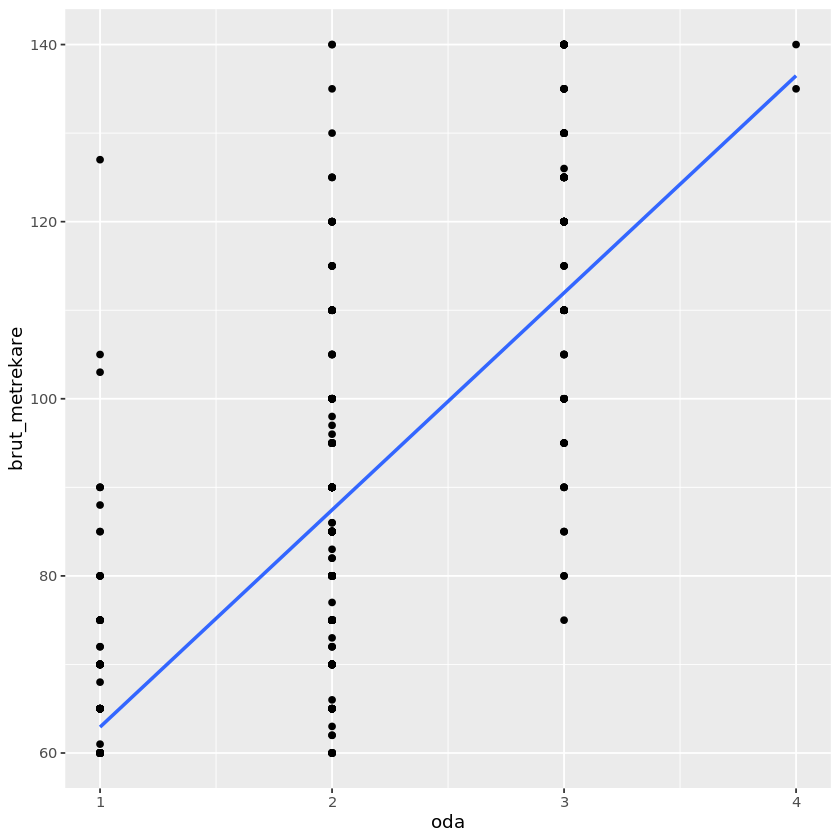

In [9]:
realty_data2 %>% ggplot(aes(x = oda,
                           y = brut_metrekare)) +
                        geom_point() +
geom_smooth(method = "lm", formula = y ~ x, se = F)

## Partitioning - with tidymodels

In [10]:
set.seed(1000)

In [11]:
realty_split <- initial_split(realty_data2, prop = 0.75, 
                                   strata = brut_metrekare)

In [12]:
realty_training <- realty_split %>% 
                        training()

In [13]:
realty_test <- realty_split %>% 
                        testing()

In [14]:
realty_training

,oda,brut_metrekare
,<int>,<int>
1,3,120
2,2,100
3,2,70
4,2,75
6,2,80
9,3,125
10,2,90
11,2,80
13,2,100


In [15]:
realty_test

,oda,brut_metrekare
,<int>,<int>
5,2,80
7,2,95
8,2,85
12,2,75
14,3,100
19,2,120
22,2,105
23,2,110
25,2,85


## Model Specification and Fitting

In [16]:
lm_model <- linear_reg() %>% 
            set_engine('lm') %>% # adds lm implementation of linear regression
            set_mode('regression')

In [17]:
lm_fit <- lm_model %>% 
          fit(brut_metrekare ~ oda, data = realty_training)

In [18]:
lm_fit

parsnip model object

Fit time:  2ms 

Call:
stats::lm(formula = brut_metrekare ~ oda, data = data)

Coefficients:
(Intercept)          oda  
      38.10        24.71  


## Exploring Training Results

In [19]:
names(lm_fit)

[1] "lvl"     "spec"    "fit"     "preproc" "elapsed"

In [20]:
summary(lm_fit$fit)


Call:
stats::lm(formula = brut_metrekare ~ oda, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-37.22  -7.51  -2.51   7.49  64.20 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   38.098      2.244   16.98   <2e-16 ***
oda           24.706      1.067   23.16   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.46 on 525 degrees of freedom
Multiple R-squared:  0.5054,	Adjusted R-squared:  0.5045 
F-statistic: 536.5 on 1 and 525 DF,  p-value: < 2.2e-16


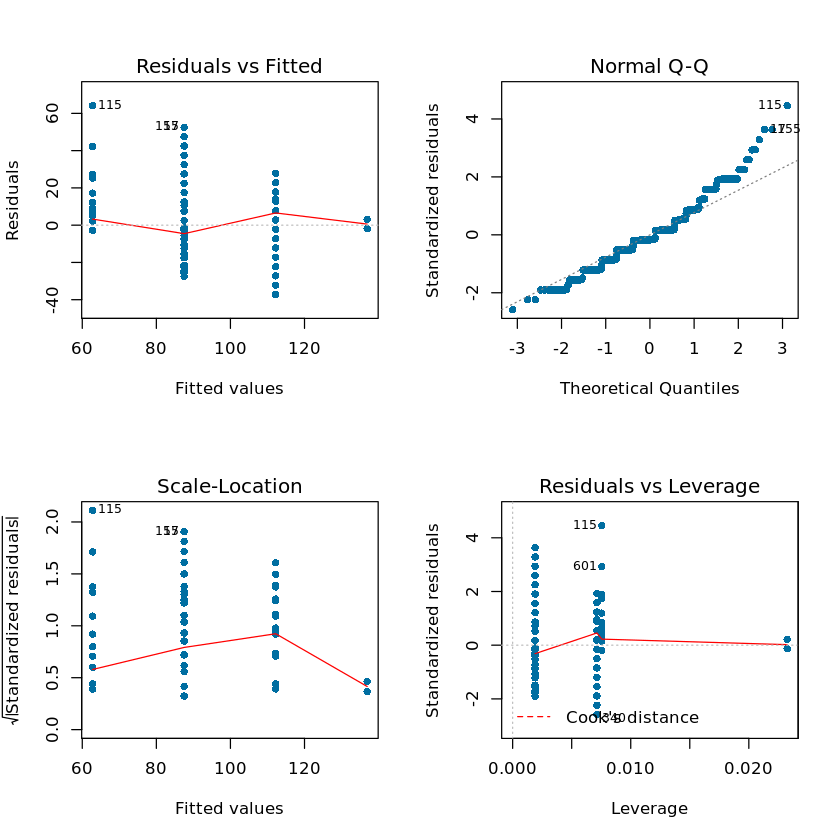

In [21]:
par(mfrow=c(2,2))
plot(lm_fit$fit, 
     pch = 16,  
     col = '#006EA1')

In [22]:
#Tidy training results:

In [23]:
tidy(lm_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),38.09840,2.243694,16.98021,7.285858e-52
oda,24.70596,1.066608,23.16312,2.652208e-82


In [24]:
glance(lm_fit)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5054309,0.5044888,14.46071,536.5301,2.652208e-82,1,-2154.625,4315.25,4328.052,109783.8,525,527


## Evaluating Test Set Accuracy

In [25]:
predict(lm_fit, new_data = realty_test)

.pred
<dbl>
87.51032
87.51032
87.51032
87.51032
112.21628
87.51032
87.51032
87.51032
87.51032


In [26]:
realty_test_results <- predict(lm_fit, new_data = realty_test) %>% 
                            bind_cols(realty_test)

In [27]:
realty_test_results

.pred,oda,brut_metrekare
<dbl>,<int>,<int>
87.51032,2,80
87.51032,2,95
87.51032,2,85
87.51032,2,75
112.21628,3,100
87.51032,2,120
87.51032,2,105
87.51032,2,110
87.51032,2,85


## RMSE and R2 on the Test Data 

In [28]:
rmse(realty_test_results, 
     truth = brut_metrekare,
     estimate = .pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,13.76175


In [29]:
rsq(realty_test_results, 
     truth = brut_metrekare,
     estimate = .pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.4718851


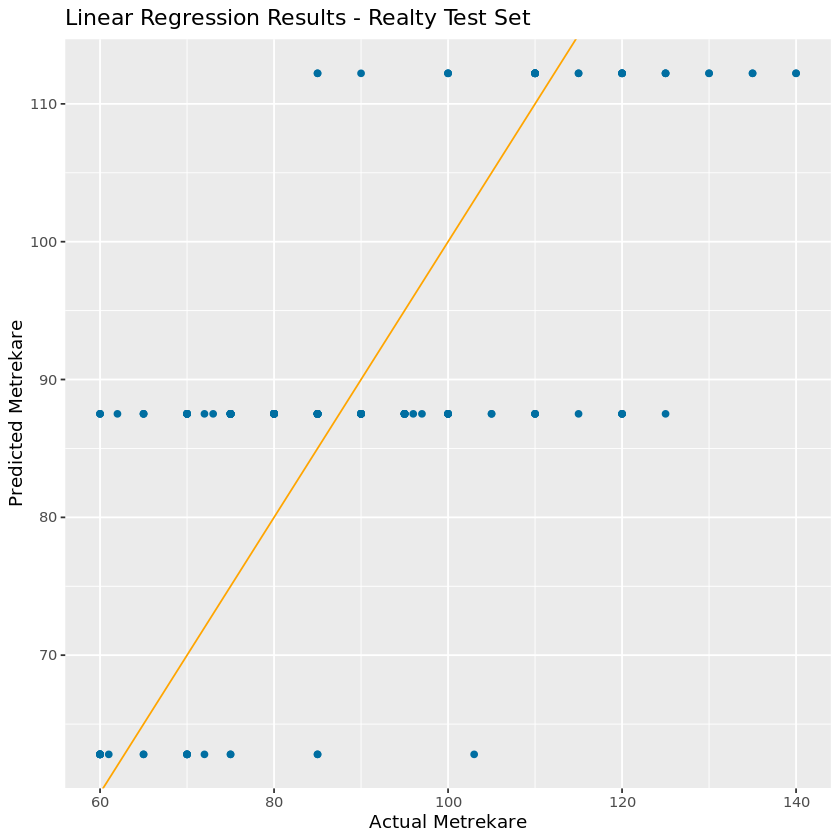

In [30]:
ggplot(data = realty_test_results,
       mapping = aes(x = brut_metrekare, y = .pred)) +
  geom_point(color = '#006EA1') +
  geom_abline(intercept = 0, slope = 1, color = 'orange') +
  labs(title = 'Linear Regression Results - Realty Test Set',
       x = 'Actual Metrekare',
       y = 'Predicted Metrekare')